<a href="https://colab.research.google.com/github/MohitBajpai78271/Chatting-APP/blob/main/Copy_of_Calibre_BCD_AM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install torch torchvision timm opencv-python scikit-learn albumentations matplotlib

In [ ]:
!pip install vision-mamba

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.8/533.8 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 70.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.0/48.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.0/103.0 kB 11.0 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.5.1
    Uninstalling joblib-1.5.1:
      Successfully uninstalled joblib-1.5.1
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This beh

In [ ]:
!wget -q https://github.com/kyeGomez/VisionMamba/archive/refs/heads/main.zip -O VisionMamba.zip
!unzip -q VisionMamba.zip
%cd VisionMamba-main
!ls

/content/VisionMamba-main
agorabanner.png  LICENSE	 README.md	   scripts
example.py	 pyproject.toml  requirements.txt  vision_mamba


In [ ]:
!pip install --no-deps torch torchvision timm einops numpy tqdm matplotlib

In [ ]:
import sys
sys.path.append('/content/VisionMamba-main')

In [ ]:
from vision_mamba import Vim
import torch

model = Vim(
    dim=256,           # embedding dimension
    dt_rank=32,        # Mamba rank
    dim_inner=256,     # inner hidden dim in Mamba
    d_state=256,       # state dimension
    num_classes=2,     # output classes
    image_size=224,    # input image size
    patch_size=16,     # patch size (ViT-style)
    channels=3,        # RGB
    dropout=0.1,       # dropout rate
    depth=4            # number of Mamba blocks
)

print(model)

x = torch.randn(1, 3, 224, 224)
out = model(x)
print("✅ Output shape:", out.shape)


Vim(
  (to_patch_embedding): Sequential(
    (0): Rearrange('b c (h p1) (w p2) -> b (h w) (p1 p2 c)', p1=16, p2=16)
    (1): Linear(in_features=768, out_features=256, bias=True)
  )
  (dropout): Dropout(p=0.1, inplace=False)
  (to_latent): Identity()
  (layers): ModuleList(
    (0-3): 4 x VisionEncoderMambaBlock(
      (forward_conv1d): Conv1d(256, 256, kernel_size=(1,), stride=(1,))
      (backward_conv1d): Conv1d(256, 256, kernel_size=(1,), stride=(1,))
      (norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
      (silu): SiLU()
      (ssm): SSM(
        (deltaBC_layer): Linear(in_features=256, out_features=544, bias=False)
        (dt_proj_layer): Linear(in_features=32, out_features=256, bias=True)
      )
      (proj): Linear(in_features=256, out_features=256, bias=True)
      (softplus): Softplus(beta=1.0, threshold=20.0)
    )
  )
  (output_head): Sequential(
    (0): Reduce('b s d -> b d', 'mean')
    (1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
    (2)

In [ ]:
from PIL import Image
import torchvision.transforms as transforms
import torch

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # ViT input size
    transforms.ToTensor(),          # Convert to tensor
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)  # Normalize to [-1, 1]
])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os
zip_path = '/content/drive/MyDrive/CBIS-DDSM.zip'
extract_path = '/content/mammogram_data'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
# Check how many files were extracted
import os

file_count = sum(len(files) for _, _, files in os.walk(extract_path))
print(f"Total files extracted: {file_count}")

# Optionally show a few example paths
for root, dirs, files in os.walk(extract_path):
    if files:
        print("Example file path:", os.path.join(root, files[0]))
        break


Total files extracted: 10243
Example file path: /content/mammogram_data/csv/meta.csv


In [ ]:
base_dir = '/content/mammogram_data'
for root, dirs, files in os.walk(base_dir):
    print("Root:", root)
    print("Dirs:", dirs)
    print("Files:", files)
    print('-' * 40)
    break  # just show top level

Root: /content/mammogram_data
Dirs: ['csv', 'jpeg']
Files: []
----------------------------------------


In [ ]:
import glob

# Define path to jpeg images
image_files = glob.glob('/content/mammogram_data/jpeg/**/*.jpg', recursive=True)
print("Total images found:", len(image_files))

# Show a sample image path
if image_files:
    print("Example image path:", image_files[0])
else:
    print("No image files found.")


Total images found: 10237
Example image path: /content/mammogram_data/jpeg/1.3.6.1.4.1.9590.100.1.2.22431635612076544114930735670713643392/1-137.jpg


In [ ]:

sample_image_path = image_files[0]
image = Image.open(sample_image_path).convert("RGB")
input_tensor = transform(image).unsqueeze(0)  # [1, 3, 224, 224]

print("Tensor shape:", input_tensor.shape)


Tensor shape: torch.Size([1, 3, 224, 224])


In [ ]:
model.eval()  # put model in inference mode

with torch.no_grad():
    output = model(input_tensor)  # shape: [1, 2]
    probabilities = torch.softmax(output, dim=1)

print("Output:", output)
print("Probabilities:", probabilities)
print("Predicted class:", torch.argmax(probabilities).item())

Patch embedding: torch.Size([1, 196, 256])
Cls tokens: torch.Size([1, 1, 256])
torch.Size([1, 196, 256])
Conv1d: tensor([[[1.0553, 1.0964, 1.0852,  ..., 0.8953, 1.1302, 1.0331],
         [0.5192, 0.5426, 0.5161,  ..., 0.6144, 0.4748, 0.5312],
         [0.7362, 0.7442, 0.7607,  ..., 0.8273, 0.8064, 0.8102],
         ...,
         [0.8513, 0.8639, 0.8638,  ..., 0.8994, 0.7494, 0.8239],
         [1.1034, 1.0608, 1.0775,  ..., 1.0199, 0.9630, 1.1313],
         [0.8504, 0.8390, 0.8594,  ..., 0.7111, 0.8605, 0.8973]]])
Conv1d: tensor([[[0.6086, 0.6278, 0.6110,  ..., 0.5459, 0.6269, 0.6420],
         [0.8222, 0.8437, 0.8514,  ..., 0.7425, 1.0820, 0.9304],
         [0.7186, 0.7235, 0.6835,  ..., 0.8664, 0.7035, 0.6523],
         ...,
         [0.6829, 0.6603, 0.6744,  ..., 0.7386, 0.7091, 0.7023],
         [0.9047, 0.8937, 0.9371,  ..., 0.7862, 0.9388, 0.9887],
         [0.4869, 0.4599, 0.4805,  ..., 0.4585, 0.3825, 0.4292]]])
Layer: torch.Size([1, 196, 256])
Conv1d: tensor([[[0.9576, 0.9816, 

In [ ]:
from torchvision import transforms
import torchvision.transforms.functional as TF
from PIL import Image
import matplotlib.pyplot as plt
import torch

In [ ]:
image_tensor = transform(image).unsqueeze(0)

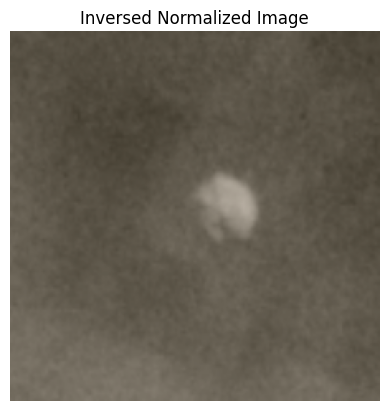

In [ ]:
import matplotlib.pyplot as plt
import torchvision.transforms.functional as TF

# Reverse transform to show the image
inv_normalize = transforms.Normalize(
    mean=[-0.485 / 0.229, -0.456 / 0.224, -0.406 / 0.225],
    std=[1 / 0.229, 1 / 0.224, 1 / 0.225]
)
img_inv = inv_normalize(image_tensor.squeeze(0))  # remove batch dim
img_pil = TF.to_pil_image(img_inv)

# Display image and prediction
plt.imshow(img_pil)
plt.title('Inversed Normalized Image')
plt.axis('off')
plt.show()


In [ ]:
from vision_mamba.model import Vim
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

# Initialize the ViM model
model = Vim(
    dim=256,
    dt_rank=32,
    dim_inner=256,
    d_state=256,
    num_classes=2,           # Binary classification (e.g., Cancer / No Cancer)
    image_size=224,
    patch_size=16,
    channels=3,
    dropout=0.1,
    depth=4
).to(device).eval()  # Set model to eval mode


In [ ]:
# Move the input tensor to device
input_tensor = input_tensor.to(device)

# Forward pass through the model
with torch.no_grad():
    output = model(input_tensor)  # [1, 2] shape for binary classification
    predicted_class = torch.argmax(output, dim=1).item()

print("Model output logits:", output)
print("Predicted class:", predicted_class)


Patch embedding: torch.Size([1, 196, 256])
Cls tokens: torch.Size([1, 1, 256])
torch.Size([1, 196, 256])
Conv1d: tensor([[[0.8445, 0.8059, 0.8163,  ..., 0.6610, 0.6911, 0.8255],
         [0.7370, 0.7297, 0.7449,  ..., 0.7512, 0.7907, 0.7619],
         [0.7956, 0.7918, 0.8095,  ..., 0.9202, 0.7251, 0.7913],
         ...,
         [0.6651, 0.6406, 0.6409,  ..., 0.6660, 0.5881, 0.6304],
         [0.7379, 0.7375, 0.7249,  ..., 0.8261, 0.6724, 0.7437],
         [0.7882, 0.8187, 0.8362,  ..., 0.8702, 0.9568, 0.8429]]],
       device='cuda:0')
Conv1d: tensor([[[0.5122, 0.5030, 0.5151,  ..., 0.5064, 0.5099, 0.5179],
         [0.5363, 0.5366, 0.5299,  ..., 0.5326, 0.6126, 0.5925],
         [0.5749, 0.5784, 0.5703,  ..., 0.6244, 0.6438, 0.6077],
         ...,
         [0.6849, 0.6761, 0.6951,  ..., 0.8515, 0.6176, 0.7020],
         [1.0180, 1.0440, 1.0391,  ..., 0.9484, 0.9564, 1.0613],
         [0.4849, 0.4864, 0.4720,  ..., 0.5836, 0.4808, 0.5010]]],
       device='cuda:0')
Layer: torch.Size([

In [ ]:
import os

# Define the root directory of your dataset
root_dir = "/content/mammogram_data"

# Now list the contents of the CSV folder
print(os.listdir(os.path.join(root_dir, 'csv')))

['meta.csv', 'calc_case_description_train_set.csv', 'mass_case_description_test_set.csv', 'mass_case_description_train_set.csv', 'calc_case_description_test_set.csv', 'dicom_info.csv']


In [ ]:
import pandas as pd

csv_path = os.path.join(root_dir, 'csv', 'mass_case_description_train_set.csv')
df = pd.read_csv(csv_path)

print("Columns:", df.columns.tolist())
df.head(5)

Columns: ['patient_id', 'breast_density', 'left or right breast', 'image view', 'abnormality id', 'abnormality type', 'mass shape', 'mass margins', 'assessment', 'pathology', 'subtlety', 'image file path', 'cropped image file path', 'ROI mask file path']


,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....


In [ ]:
# 3. Gather all JPEG paths
jpeg_root = os.path.join(root_dir, "jpeg")
jpeg_paths = glob.glob(os.path.join(jpeg_root, "**", "*.jpg"), recursive=True)
for p in jpeg_paths[:5]:
    print(p)


/content/mammogram_data/jpeg/1.3.6.1.4.1.9590.100.1.2.22431635612076544114930735670713643392/1-137.jpg
/content/mammogram_data/jpeg/1.3.6.1.4.1.9590.100.1.2.22431635612076544114930735670713643392/2-115.jpg
/content/mammogram_data/jpeg/1.3.6.1.4.1.9590.100.1.2.167551388612176433614880821111626540662/1-220.jpg
/content/mammogram_data/jpeg/1.3.6.1.4.1.9590.100.1.2.167551388612176433614880821111626540662/2-198.jpg
/content/mammogram_data/jpeg/1.3.6.1.4.1.9590.100.1.2.4258120910410897428422437754132883711/1-109.jpg


In [ ]:
import os
import glob
import pandas as pd

# Load CSV
root_dir = "/content/mammogram_data"
csv_path = os.path.join(root_dir, "csv", "mass_case_description_train_set.csv")
df = pd.read_csv(csv_path)

# Extract UID2 from CSV path (second-to-last part)
def extract_uid2(path):
    parts = path.split('/')
    return parts[-2] if len(parts) >= 2 else None

df["uid_folder"] = df["image file path"].apply(extract_uid2)

# Get all JPEG image paths
jpeg_root = os.path.join(root_dir, "jpeg")
jpeg_paths = glob.glob(os.path.join(jpeg_root, "**", "*.jpg"), recursive=True)
print(f"Found {len(jpeg_paths)} JPEG images.")

# Map: UID folder → list of JPEG paths
from collections import defaultdict
uid_map = defaultdict(list)
for p in jpeg_paths:
    uid = os.path.basename(os.path.dirname(p))
    uid_map[uid].append(p)

# Try to match UID folder from CSV to real JPEGs
def match_jpeg(uid):
    return uid_map[uid][0] if uid in uid_map else None

df["matched_path"] = df["uid_folder"].apply(match_jpeg)

# Drop unmatched
before = len(df)
df = df.dropna(subset=["matched_path"]).reset_index(drop=True)
after = len(df)

print(f"Matched {after} / {before} CSV entries to JPEGs.")
if after > 0:
    print("Example match:", df[["image file path", "matched_path"]].iloc[0])
else:
    print("⚠️ Still no matches found.")


Found 10237 JPEG images.
Matched 1318 / 1318 CSV entries to JPEGs.
Example match: image file path    Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...
matched_path       /content/mammogram_data/jpeg/1.3.6.1.4.1.9590....
Name: 0, dtype: object


In [ ]:
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

# Binary label: MALIGNANT = 1, else 0
df["label"] = (df["pathology"] == "MALIGNANT").astype(int)

# Dataset class
class MammogramDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.df = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_path = self.df.loc[idx, "matched_path"]
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        label = torch.tensor(self.df.loc[idx, "label"], dtype=torch.long)
        return image, label

# Image preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
])

# Dataset + Dataloader
dataset = MammogramDataset(df, transform=transform)
loader = DataLoader(dataset, batch_size=16, shuffle=True, num_workers=2)

# Sanity-check
images, labels = next(iter(loader))
print("✅ Loaded batch")
print("Image batch shape:", images.shape)
print("Label batch shape:", labels.shape)


✅ Loaded batch
Image batch shape: torch.Size([16, 3, 224, 224])
Label batch shape: torch.Size([16])


In [ ]:
model.eval()  # set model to inference mode

with torch.no_grad():
    images = images.to(device)
    outputs = model(images)  # shape: [16, 2] for binary classification
    probs = torch.softmax(outputs, dim=1)
    preds = torch.argmax(probs, dim=1)

print("Predicted class indices:", preds.cpu().numpy())
print("Probabilities:", probs.cpu().numpy())


Patch embedding: torch.Size([16, 196, 256])
Cls tokens: torch.Size([16, 1, 256])
torch.Size([16, 196, 256])
Conv1d: tensor([[[0.7977, 0.8285, 0.8279,  ..., 0.8045, 0.8022, 0.7835],
         [0.7092, 0.7515, 0.7506,  ..., 0.7004, 0.6961, 0.6849],
         [0.7942, 0.7791, 0.7790,  ..., 0.6545, 0.6467, 0.6316],
         ...,
         [0.6354, 0.6322, 0.6324,  ..., 0.6471, 0.6491, 0.6631],
         [0.7554, 0.7312, 0.7309,  ..., 0.7441, 0.7422, 0.7387],
         [0.7685, 0.8124, 0.8119,  ..., 0.7932, 0.7927, 0.7929]],

        [[0.5320, 0.5621, 0.5494,  ..., 0.8362, 0.8376, 0.8368],
         [0.7190, 0.7251, 0.7000,  ..., 0.7497, 0.7504, 0.7494],
         [0.6798, 0.6740, 0.6798,  ..., 0.7682, 0.7678, 0.7660],
         ...,
         [0.7544, 0.7284, 0.7594,  ..., 0.6371, 0.6364, 0.6365],
         [0.6584, 0.6798, 0.6900,  ..., 0.7211, 0.7213, 0.7202],
         [0.6394, 0.6118, 0.6030,  ..., 0.8063, 0.8040, 0.8029]],

        [[0.8230, 0.8288, 0.8285,  ..., 0.8285, 0.8323, 0.8235],
       

In [ ]:
import torch.nn as nn
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)


In [ ]:
import torch.nn as nn
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Example simple model (replace with yours if you have one)
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(224*224*3, 256),
    nn.ReLU(),
    nn.Linear(256, 2)  # Binary classification (2 classes)
).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

start_epoch = 0  # for resuming


In [ ]:
num_epochs = 2  # first part of training

for epoch in range(start_epoch, start_epoch + num_epochs):
    model.train()
    total_loss = 0.0
    correct = 0
    total = 0

    for images, labels in loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        preds = torch.argmax(outputs, dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    acc = correct / total
    print(f"Epoch {epoch+1} | Loss: {total_loss:.4f} | Accuracy: {acc:.4f}")

# Save checkpoint to resume later
torch.save({
    'epoch': epoch + 1,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict()
}, "checkpoint.pth")

# Clear unused GPU memory
torch.cuda.empty_cache()

Epoch 1 | Loss: 690.4145 | Accuracy: 0.5296
Epoch 2 | Loss: 82.3599 | Accuracy: 0.5812


In [ ]:
checkpoint = torch.load("checkpoint.pth", map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
start_epoch = checkpoint['epoch']

num_epochs = 3  # remaining epochs to finish 5 total

for epoch in range(start_epoch, start_epoch + num_epochs):
    model.train()
    total_loss = 0.0
    correct = 0
    total = 0

    for images, labels in loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        preds = torch.argmax(outputs, dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    acc = correct / total
    print(f"Epoch {epoch+1} | Loss: {total_loss:.4f} | Accuracy: {acc:.4f}")

torch.save(model.state_dict(), "final_model.pth")
torch.cuda.empty_cache()


Epoch 3 | Loss: 66.2562 | Accuracy: 0.6017
Epoch 4 | Loss: 56.6814 | Accuracy: 0.5835
Epoch 5 | Loss: 53.1059 | Accuracy: 0.6495


In [ ]:
print(f"Total images in dataset: {len(dataset)}")
print(f"Steps per epoch: {len(loader)}")


Total images in dataset: 1318
Steps per epoch: 83


In [ ]:
# Install timm if not already installed
!pip install timm -q

import timm
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from tqdm import tqdm
import numpy as np
import random

# reproducibility (best effort)
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

set_seed(42)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)


Device: cuda


In [ ]:
from torchvision import transforms

imagenet_mean = [0.485, 0.456, 0.406]
imagenet_std  = [0.229, 0.224, 0.225]

train_transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=imagenet_mean, std=imagenet_std)
])

val_transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=imagenet_mean, std=imagenet_std)
])

# Recreate dataset/dataloader with your MammogramDataset class,
# passing train_transform/val_transform as appropriate.
# Example: split df into train_df, val_df first (stratified recommended)
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)

train_ds = MammogramDataset(train_df.reset_index(drop=True), transform=train_transform)
val_ds   = MammogramDataset(val_df.reset_index(drop=True),   transform=val_transform)

train_loader = DataLoader(train_ds, batch_size=16, shuffle=True, num_workers=4, pin_memory=True)
val_loader   = DataLoader(val_ds,   batch_size=16, shuffle=False, num_workers=4, pin_memory=True)


In [ ]:
# assume you already have a Vim class loaded (vision_mamba.model.Vim)
# If you earlier created a simple model, rename correctly.

# Your Vim model (use whatever config you prefer)
model_vim = Vim(
    dim=256,
    dt_rank=32,
    dim_inner=256,
    d_state=256,
    num_classes=2,
    image_size=224,
    patch_size=16,
    channels=3,
    dropout=0.1,
    depth=4
).to(device)

# EfficientNet via timm
model_eff = timm.create_model('efficientnet_b0', pretrained=True, num_classes=2).to(device)

# Optionally, freeze backbone layers first (warm-up), then unfreeze for fine-tuning.
def freeze_backbone(model, freeze=True):
    # freeze everything except classifier head (common for timm models)
    for name, param in model.named_parameters():
        if 'classifier' in name or 'fc' in name or 'head' in name:
            param.requires_grad = True
        else:
            param.requires_grad = not freeze

freeze_backbone(model_eff, freeze=False)  # set True if you want initial freeze


model.safetensors:   0%|          | 0.00/21.4M [00:00<?, ?B/s]

In [ ]:
from torch.cuda.amp import autocast, GradScaler

def evaluate(model, loader):
    model.eval()
    y_true = []
    y_prob = []
    with torch.no_grad():
        for imgs, labels in loader:
            imgs = imgs.to(device)
            labels = labels.to(device)
            outputs = model(imgs)
            probs = torch.softmax(outputs, dim=1)[:,1].detach().cpu().numpy()
            y_prob.extend(probs)
            y_true.extend(labels.detach().cpu().numpy())
    y_true = np.array(y_true)
    y_prob = np.array(y_prob)
    y_pred = (y_prob >= 0.5).astype(int)
    acc = accuracy_score(y_true, y_pred)
    try:
        auc = roc_auc_score(y_true, y_prob)
    except:
        auc = float('nan')
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0.0  # recall
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0.0
    return {'acc': acc, 'auc': auc, 'sens': sensitivity, 'spec': specificity, 'y_true': y_true, 'y_prob': y_prob}

def train_model(model, train_loader, val_loader, lr=1e-4, weight_decay=1e-5, epochs=8, model_name='model'):
    # Only parameters with requires_grad=True will be optimized
    params = [p for p in model.parameters() if p.requires_grad]
    optimizer = optim.AdamW(params, lr=lr, weight_decay=weight_decay)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=2, verbose=True)
    criterion = nn.CrossEntropyLoss()  # optionally use class weights

    scaler = GradScaler()
    best_auc = -np.inf
    best_state = None

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        pbar = tqdm(train_loader, desc=f'{model_name} Epoch {epoch+1}/{epochs}')
        for imgs, labels in pbar:
            imgs = imgs.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()
            with autocast():
                outputs = model(imgs)
                loss = criterion(outputs, labels)
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()

            running_loss += loss.item() * imgs.size(0)
            pbar.set_postfix(loss=running_loss / len(train_loader.dataset))

        # validate
        val_metrics = evaluate(model, val_loader)
        val_auc = val_metrics['auc']
        print(f"Epoch {epoch+1} | Val AUC: {val_auc:.4f} | Acc: {val_metrics['acc']:.4f} | Sens: {val_metrics['sens']:.4f} | Spec: {val_metrics['spec']:.4f}")
        scheduler.step(val_auc)

        # save best by AUC
        if val_auc > best_auc:
            best_auc = val_auc
            best_state = {
                'model_state': model.state_dict(),
                'optimizer_state': optimizer.state_dict(),
                'epoch': epoch+1,
                'val_auc': val_auc
            }
            torch.save(best_state, f'{model_name}_best.pth')
            print(f"Saved best checkpoint for {model_name} (AUC={val_auc:.4f})")

    # load best state before returning
    if best_state is not None:
        model.load_state_dict(best_state['model_state'])
    return model, best_auc, val_metrics


In [ ]:
# import gc
# import torch

# # Train Vim
# del model_eff  # unload EfficientNet from memory
# gc.collect()
# torch.cuda.empty_cache()

# train_loader_vim = DataLoader(train_ds, batch_size=4, shuffle=True, num_workers=4, pin_memory=True)
# val_loader_vim   = DataLoader(val_ds,   batch_size=4, shuffle=False, num_workers=4, pin_memory=True)

# model_vim, best_auc_vim, vim_val_metrics = train_model(
#     model_vim, train_loader_vim, val_loader_vim,
#     lr=1e-4, epochs=8, model_name='vim'
# )

# del model_vim
# gc.collect()
# torch.cuda.empty_cache()

# train_loader_eff = DataLoader(train_ds, batch_size=16, shuffle=True, num_workers=4, pin_memory=True)
# val_loader_eff   = DataLoader(val_ds,   batch_size=16, shuffle=False, num_workers=4, pin_memory=True)

# model_eff = timm.create_model('efficientnet_b0', pretrained=True, num_classes=2).to(device)

# model_eff, best_auc_eff, eff_val_metrics = train_model(
#     model_eff, train_loader_eff, val_loader_eff,
#     lr=5e-5, epochs=8, model_name='efficientnet_b0'
# )


In [ ]:
# import gc
# import torch

# # Free memory from EfficientNet before training ViM
# try:
#     del model_eff
# except NameError:
#     pass
# gc.collect()
# torch.cuda.empty_cache()

# # Smaller batch for ViM
# train_loader_vim = DataLoader(train_ds, batch_size=4, shuffle=True, num_workers=4, pin_memory=True)
# val_loader_vim   = DataLoader(val_ds,   batch_size=4, shuffle=False, num_workers=4, pin_memory=True)

# # Train Vim
# model_vim, best_auc_vim, vim_val_metrics = train_model(
#     model_vim, train_loader_vim, val_loader_vim,
#     lr=1e-4, epochs=8, model_name='vim'
# )

# # Save after training
# torch.save(model_vim.state_dict(), "vim_model_final.pth")
# print("✅ Vim training complete")


TypeError: ReduceLROnPlateau.__init__() got an unexpected keyword argument 'verbose'

In [ ]:
# CELL 1 - Setup
import os, gc, math, random, time
import numpy as np
import torch
from torch.utils.data import DataLoader
from torchvision import transforms
from sklearn.model_selection import train_test_split

# GPU fragmentation helper (set before heavy allocation if you like)
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:128"

# reproducibility (best-effort)
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(SEED)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# --- Image transforms (smaller size for Colab) ---
IMAGE_SIZE = 192   # reduce from 224 -> 192 to save memory/time
imagenet_mean = [0.485, 0.456, 0.406]
imagenet_std  = [0.229, 0.224, 0.225]

train_transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=imagenet_mean, std=imagenet_std)
])

val_transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=imagenet_mean, std=imagenet_std)
])

# --- Build datasets/dataloaders ---
# Assumes `df` and `MammogramDataset` are already defined in your notebook (from previous cells).
# If not, re-run the code that created `df` and MammogramDataset first.
train_df, val_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=SEED)

train_ds = MammogramDataset(train_df.reset_index(drop=True), transform=train_transform)
val_ds   = MammogramDataset(val_df.reset_index(drop=True),   transform=val_transform)

# Choose small dataloader worker count for Colab
NUM_WORKERS = 2

# We'll use small batch for ViM and bigger for EfficientNet (Eff will be trained later)
BATCH_VIM = 4
BATCH_EFF = 12   # try 12; reduce to 8 if you still see OOM

train_loader_vim = DataLoader(train_ds, batch_size=BATCH_VIM, shuffle=True, num_workers=NUM_WORKERS, pin_memory=True)
val_loader_vim   = DataLoader(val_ds,   batch_size=BATCH_VIM, shuffle=False, num_workers=NUM_WORKERS, pin_memory=True)

# Keep loadrs for EfficientNet ready (we'll create them later when training EfficientNet)
train_loader_eff = DataLoader(train_ds, batch_size=BATCH_EFF, shuffle=True, num_workers=NUM_WORKERS, pin_memory=True)
val_loader_eff   = DataLoader(val_ds,   batch_size=BATCH_EFF, shuffle=False, num_workers=NUM_WORKERS, pin_memory=True)

print(f"Train samples: {len(train_ds)}, Val samples: {len(val_ds)}")
print(f"Vim batch: {BATCH_VIM}, Eff batch: {BATCH_EFF}")


Device: cuda
Train samples: 1054, Val samples: 264
Vim batch: 4, Eff batch: 12


In [ ]:
# CELL 2 - Build models
import timm
from vision_mamba.model import Vim   # your existing import; adjust if path differs

USE_SMALL_VIM = True  # set False to use your full original ViM config (may OOM on free Colab)

def create_vim(small=USE_SMALL_VIM):
    if small:
        return Vim(
            dim=128, dt_rank=16, dim_inner=128, d_state=128,
            num_classes=2, image_size=IMAGE_SIZE, patch_size=16, channels=3,
            dropout=0.1, depth=2
        )
    else:
        return Vim(
            dim=256, dt_rank=32, dim_inner=256, d_state=256,
            num_classes=2, image_size=IMAGE_SIZE, patch_size=16, channels=3,
            dropout=0.1, depth=4
        )

# Create ViM (on CPU for now)
model_vim = create_vim().to(device)  # keep in float32 (we use autocast)
print("ViM params:", sum(p.numel() for p in model_vim.parameters()))

# EfficientNet creation here but don't move to GPU yet (we'll load it later)
def create_eff():
    return timm.create_model('efficientnet_b0', pretrained=True, num_classes=2)

model_eff = create_eff()  # do NOT .to(device) now
print("EfficientNet created (not loaded on GPU yet).")


ViM params: 305666
EfficientNet created (not loaded on GPU yet).


In [ ]:
# CELL 3 - Utilities
import torch.nn as nn
import torch.optim as optim
from torch.cuda.amp import autocast, GradScaler
from tqdm import tqdm
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix

def evaluate_probs(model, loader):
    model.eval()
    y_true, y_prob = [], []
    with torch.no_grad():
        for imgs, labels in loader:
            imgs = imgs.to(device)
            labels = labels.to(device)
            with autocast():
                out = model(imgs)
                probs = torch.softmax(out, dim=1)[:,1]
            y_true.extend(labels.cpu().numpy())
            y_prob.extend(probs.cpu().numpy())
    y_true = np.array(y_true); y_prob = np.array(y_prob)
    y_pred = (y_prob >= 0.5).astype(int)
    acc = accuracy_score(y_true, y_pred)
    auc = float('nan')
    if len(np.unique(y_true))>1:
        auc = roc_auc_score(y_true, y_prob)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel() if len(y_true)>1 else (0,0,0,0)
    sens = tp/(tp+fn) if (tp+fn)>0 else 0.0
    spec = tn/(tn+fp) if (tn+fp)>0 else 0.0
    return {'acc': acc, 'auc': auc, 'sens': sens, 'spec': spec, 'y_true': y_true, 'y_prob': y_prob}

def run_one_epoch_checkpointed(model, model_name, train_loader, val_loader, lr=1e-4, weight_decay=1e-5):
    """
    Runs exactly one training epoch (and validation) for `model`.
    Creates optimizer and scaler on first run; if checkpoint exists, resumes optimizer and epoch count.
    Saves checkpoint to {model_name}_checkpoint.pth and {model_name}_best.pth when improved AUC.
    """
    device_local = device
    ckpt_path = f"{model_name}_checkpoint.pth"
    best_path = f"{model_name}_best.pth"

    # create optimizer & scheduler & criterion & scaler
    opt = optim.AdamW([p for p in model.parameters() if p.requires_grad], lr=lr, weight_decay=weight_decay)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(opt, mode='max', factor=0.5, patience=2, verbose=True)
    criterion = nn.CrossEntropyLoss()
    scaler = GradScaler()

    # try to load checkpoint
    start_completed_epochs = 0
    best_auc = -np.inf
    if os.path.exists(ckpt_path):
        ck = torch.load(ckpt_path, map_location=device_local)
        model.load_state_dict(ck['model_state_dict'])
        try:
            opt.load_state_dict(ck['optimizer_state_dict'])
        except Exception as e:
            print("Warning: couldn't load optimizer state (optimizer changed) -> continuing with fresh optimizer.")
        start_completed_epochs = int(ck.get('epoch', 0))
        best_auc = float(ck.get('best_auc', best_auc))
        print(f"Resuming from checkpoint. Completed epochs so far: {start_completed_epochs}, best_auc: {best_auc:.4f}")

    # TRAIN single epoch
    model.train()
    running_loss = 0.0
    batch_print_interval = 5
    pbar = tqdm(train_loader, desc=f"{model_name} epoch {start_completed_epochs+1}")
    try:
        for batch_idx, (imgs, labels) in enumerate(pbar):
            imgs = imgs.to(device_local)
            labels = labels.to(device_local)

            opt.zero_grad()
            with autocast():
                outputs = model(imgs)
                loss = criterion(outputs, labels)

            scaler.scale(loss).backward()
            scaler.step(opt)
            scaler.update()

            running_loss += float(loss.item()) * imgs.size(0)
            if batch_idx % batch_print_interval == 0:
                pbar.set_postfix(loss=running_loss / ((batch_idx+1) * train_loader.batch_size))

    except RuntimeError as e:
        if 'out of memory' in str(e):
            print("OOM during training. Clearing cache and re-raising.")
            torch.cuda.empty_cache()
        raise

    # VALIDATION
    val_metrics = evaluate_probs(model, val_loader)
    val_auc = val_metrics['auc']
    print(f"Completed epoch {start_completed_epochs+1} | Val AUC: {val_auc:.4f} | Acc: {val_metrics['acc']:.4f} | Sens: {val_metrics['sens']:.4f} | Spec: {val_metrics['spec']:.4f}")

    # update scheduler on val metric
    try:
        scheduler.step(val_auc)
    except Exception:
        pass

    # Save checkpoint (epoch count = completed epochs)
    completed = start_completed_epochs + 1
    torch.save({
        'epoch': completed,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': opt.state_dict(),
        'best_auc': max(best_auc, val_auc)
    }, ckpt_path)
    print(f"Saved checkpoint: {ckpt_path} (completed epochs = {completed})")

    # Save best
    if val_auc > best_auc:
        torch.save({
            'epoch': completed,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': opt.state_dict(),
            'best_auc': val_auc
        }, best_path)
        print(f"Saved best model: {best_path} (AUC={val_auc:.4f})")

    # free some memory
    torch.cuda.empty_cache()
    return model, val_metrics


In [ ]:
# # CELL 4 - Run one epoch for ViM (repeat as needed)
# LR_VIM = 1e-4
# WEIGHT_DECAY = 1e-5
# MODEL_NAME = "vim"   # checkpoint files: vim_checkpoint.pth  vim_best.pth

# # Make sure model_vim exists in memory (created in CELL 2)
# model_vim = model_vim.to(device)

# # Run one epoch (this will resume from vim_checkpoint.pth if present)
# model_vim, vim_val_metrics = run_one_epoch_checkpointed(model_vim, MODEL_NAME, train_loader_vim, val_loader_vim, lr=LR_VIM, weight_decay=WEIGHT_DECAY)
# print("ViM epoch done. Metrics:", vim_val_metrics)


TypeError: ReduceLROnPlateau.__init__() got an unexpected keyword argument 'verbose'

In [ ]:
# # CELL 5 - Free ViM, load EfficientNet, run one epoch (repeat to continue)
# import gc
# gc.collect()
# torch.cuda.empty_cache()

# # delete ViM from GPU to free memory (optional)
# try:
#     del model_vim
# except Exception:
#     pass
# gc.collect()
# torch.cuda.empty_cache()

# # Create EfficientNet and move to GPU
# model_eff = create_eff().to(device)

# # Run one epoch for EfficientNet (checkpointed same way)
# model_eff, eff_val_metrics = run_one_epoch_checkpointed(model_eff, "efficientnet_b0", train_loader_eff, val_loader_eff, lr=5e-5, weight_decay=1e-5)
# print("EfficientNet epoch done. Metrics:", eff_val_metrics)


TypeError: ReduceLROnPlateau.__init__() got an unexpected keyword argument 'verbose'

In [ ]:
# Cell A - quick eval of current model_eff
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# ensure model in eval mode
model_eff.eval()

# use evaluate_probs() from CELL 3 (already defined). If not defined, re-run CELL 3.
metrics_eff = evaluate_probs(model_eff, val_loader_eff)
print("EfficientNet metrics:", metrics_eff)

# confusion matrix and classification report (threshold 0.5)
y_true = metrics_eff['y_true']
y_prob = metrics_eff['y_prob']
y_pred = (np.array(y_prob) >= 0.5).astype(int)

tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print(f"Confusion matrix: TN={tn}, FP={fp}, FN={fn}, TP={tp}")
print("\nClassification report:\n", classification_report(y_true, y_pred, digits=4))


EfficientNet metrics: {'acc': 0.5265151515151515, 'auc': np.float64(0.5448069852941176), 'sens': np.float64(0.0234375), 'spec': np.float64(1.0), 'y_true': array([0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,

In [ ]:
import torch
from sklearn.utils.class_weight import compute_class_weight

classes = np.unique(train_df['label'])
class_weights = compute_class_weight('balanced', classes=classes, y=train_df['label'].values)
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)
criterion = torch.nn.CrossEntropyLoss(weight=class_weights)


In [ ]:
from torch.utils.data import WeightedRandomSampler

counts = train_df['label'].value_counts().sort_index().values   # [count_class0, count_class1]
weights_per_class = 1.0 / counts
sample_weights = train_df['label'].map(lambda x: weights_per_class[x]).values
sampler = WeightedRandomSampler(weights=sample_weights, num_samples=len(sample_weights), replacement=True)

train_loader = DataLoader(train_ds, batch_size=BATCH_VIM, sampler=sampler, num_workers=NUM_WORKERS, pin_memory=True)


In [ ]:
import numpy as np
from sklearn.metrics import roc_curve

y_true = np.array(metrics_eff['y_true'])   # or load from df_out
y_prob = np.array(metrics_eff['y_prob'])
fpr, tpr, thresholds = roc_curve(y_true, y_prob)

# find threshold for target sensitivity:
target_sens = 0.90
idx = np.argmax(tpr >= target_sens)
best_thresh = thresholds[idx]
print("Threshold for sensitivity >= {:.2f}: {:.4f}".format(target_sens, best_thresh))

# compute metrics at that threshold
y_pred = (y_prob >= best_thresh).astype(int)
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print("At thresh", best_thresh, "sens:", tp/(tp+fn), "spec:", tn/(tn+fp), "prec:", precision_score(y_true, y_pred))


Threshold for sensitivity >= 0.90: 0.0000
At thresh 3.293714e-09 sens: 0.9296875 spec: 0.13970588235294118 prec: 0.5042372881355932


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
import pandas as pd

# Use existing arrays
y_true = np.array(metrics_eff['y_true'])
y_prob = np.array(metrics_eff['y_prob'])

# best_thresh computed earlier; if not present, recompute using ROC
try:
    best_thresh
except NameError:
    from sklearn.metrics import roc_curve
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    target_sens = 0.90
    idx = np.argmax(tpr >= target_sens)
    best_thresh = thresholds[idx]
    print("Recomputed threshold for sens >= {:.2f}: {:.4f}".format(target_sens, best_thresh))

# Predictions at threshold
y_pred = (y_prob >= best_thresh).astype(int)

# Basic metrics
acc = accuracy_score(y_true, y_pred)
auc = roc_auc_score(y_true, y_prob)
prec = precision_score(y_true, y_pred, zero_division=0)
recall = recall_score(y_true, y_pred, zero_division=0)   # sensitivity
f1 = f1_score(y_true, y_pred, zero_division=0)

tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0.0

print(f"Threshold = {best_thresh:.4f}")
print(f"Accuracy = {acc:.4f}")
print(f"AUC = {auc:.4f}")
print(f"Precision = {prec:.4f}")
print(f"Sensitivity (Recall) = {recall:.4f}")
print(f"Specificity = {specificity:.4f}")
print(f"F1 = {f1:.4f}")
print(f"Confusion matrix: TN={tn}, FP={fp}, FN={fn}, TP={tp}")

# Classification report (per-class)
print("\nClassification report (thresholded predictions):\n")
print(classification_report(y_true, y_pred, digits=4))


Threshold = 0.0000
Accuracy = 0.5227
AUC = 0.5448
Precision = 0.5042
Sensitivity (Recall) = 0.9297
Specificity = 0.1397
F1 = 0.6538
Confusion matrix: TN=19, FP=117, FN=9, TP=119

Classification report (thresholded predictions):

              precision    recall  f1-score   support

           0     0.6786    0.1397    0.2317       136
           1     0.5042    0.9297    0.6538       128

    accuracy                         0.5227       264
   macro avg     0.5914    0.5347    0.4428       264
weighted avg     0.5940    0.5227    0.4364       264



Train label distribution:
label
0    545
1    509
Name: count, dtype: int64

Val label distribution:
label
0    136
1    128
Name: count, dtype: int64

Sample malignant images:


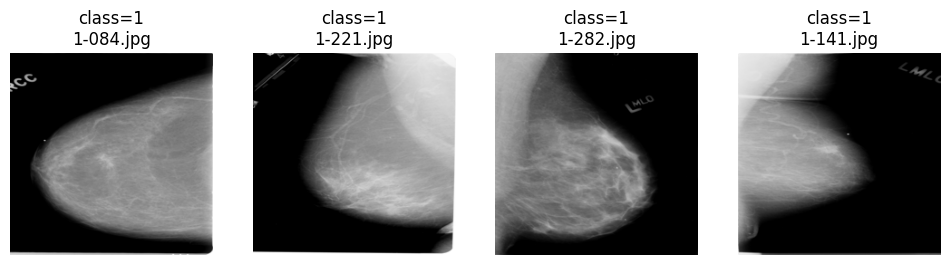


Sample benign images:


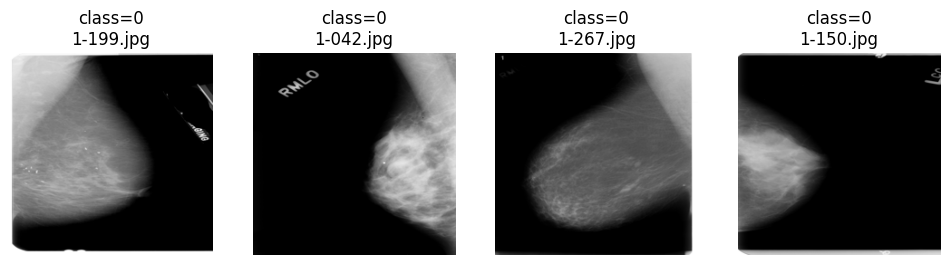

In [ ]:
# A: dataset checks
import numpy as np, matplotlib.pyplot as plt
from PIL import Image
import random

print("Train label distribution:")
print(train_df['label'].value_counts())
print("\nVal label distribution:")
print(val_df['label'].value_counts())

# show example paths and a few images
def show_random_examples(df, n=4, cls=1):
    rows = df[df['label']==cls].sample(min(n, len(df[df['label']==cls])), random_state=42)
    plt.figure(figsize=(12,3))
    for i, p in enumerate(rows['matched_path'].values):
        img = Image.open(p).convert('RGB').resize((224,224))
        plt.subplot(1,n,i+1)
        plt.title(f"class={cls}\n{p.split('/')[-1]}")
        plt.imshow(img); plt.axis('off')
    plt.show()

print("\nSample malignant images:")
show_random_examples(val_df, n=4, cls=1)
print("\nSample benign images:")
show_random_examples(val_df, n=4, cls=0)


In [ ]:
# import os, torch, traceback

# ckpt_path = "vim_checkpoint.pth"   # change if your file has another name
# fixed_path = "vim_checkpoint_fixed.pth"
# device_local = device  # from your notebook (cuda or cpu)

# if not os.path.exists(ckpt_path):
#     raise FileNotFoundError(f"{ckpt_path} not found in working dir")

# print("Attempting to load checkpoint:", ckpt_path)

# ck = None
# # Try the explicit safe option first (PyTorch 2.6+)
# try:
#     ck = torch.load(ckpt_path, map_location=device_local, weights_only=False)
#     print("Loaded with weights_only=False")
# except TypeError:
#     # older torch doesn't accept weights_only kwarg -> fallback to plain load
#     try:
#         ck = torch.load(ckpt_path, map_location=device_local)
#         print("Loaded with plain torch.load(...) (no weights_only arg)")
#     except Exception as e:
#         print("Failed plain load. Showing error:")
#         traceback.print_exc()
#         raise
# except Exception as e:
#     print("Failed to load with weights_only=False. Error below. Trying plain torch.load() as fallback.")
#     traceback.print_exc()
#     try:
#         ck = torch.load(ckpt_path, map_location=device_local)
#         print("Fallback plain load succeeded.")
#     except Exception:
#         print("Fallback also failed — cannot safely load checkpoint automatically.")
#         raise

# # At this point `ck` is the object saved in the checkpoint (could be dict with keys)
# print("Top-level checkpoint keys (if dict):", list(ck.keys()) if isinstance(ck, dict) else type(ck))

# # Extract model_state_dict if present, otherwise assume ck itself is a state_dict
# if isinstance(ck, dict):
#     if 'model_state_dict' in ck:
#         state = ck['model_state_dict']
#     elif 'model_state' in ck:
#         state = ck['model_state']
#     elif 'model' in ck and isinstance(ck['model'], dict):
#         state = ck['model']
#     else:
#         # assume ck *is* a state_dict-like mapping
#         # filter keys that look like tensor params
#         possible_state = {k: v for k, v in ck.items() if isinstance(v, (torch.Tensor, list, tuple))}
#         if len(possible_state) > 0:
#             state = ck
#         else:
#             raise RuntimeError("Could not find a model_state_dict in checkpoint. Keys: " + ", ".join(ck.keys()))
# else:
#     raise RuntimeError("Checkpoint was not a dict. Can't extract model_state_dict automatically.")

# # Save a cleaned checkpoint that contains only model_state_dict (and epoch/best if present)
# clean_ck = {'model_state_dict': state}
# if isinstance(ck, dict):
#     if 'epoch' in ck:
#         clean_ck['epoch'] = ck['epoch']
#     if 'best_auc' in ck:
#         clean_ck['best_auc'] = ck['best_auc']

# torch.save(clean_ck, fixed_path)
# print("Saved cleaned checkpoint to:", fixed_path)


FileNotFoundError: vim_checkpoint.pth not found in working dir

In [ ]:
torch.cuda.empty_cache()